In [2]:
from sklearn.datasets import make_regression 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [52]:
dataframe = pd.read_csv("/home/aditya/Downloads/salary_exp.csv")
dataframe

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [63]:
x = dataframe.iloc[:, 0].values  # To convert it into a numpy array
y = dataframe.iloc[:, 1].values
print(type(x))

<class 'numpy.ndarray'>


In [64]:
x = x.reshape(-1, 1)  # To make it a multidimensional array, required by lr.fit()
y = y.reshape(-1, 1)

In [55]:
dataframe.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [65]:
x, y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]), array([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
      

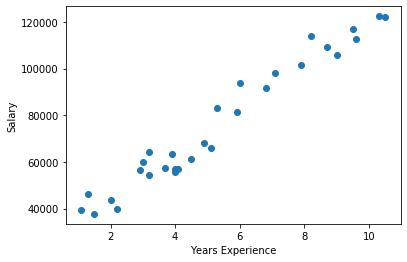

In [57]:
plt.scatter(x, y)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [58]:
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.2, random_state=10)
print(XTrain)

[[ 4.1]
 [ 9.6]
 [ 4. ]
 [ 1.3]
 [ 6. ]
 [ 4.5]
 [ 5.9]
 [ 3. ]
 [ 4. ]
 [ 8.2]
 [ 8.7]
 [10.3]
 [ 7.9]
 [ 3.9]
 [ 9.5]
 [10.5]
 [ 3.2]
 [ 9. ]
 [ 5.1]
 [ 5.3]
 [ 1.1]
 [ 4.9]
 [ 2.2]
 [ 3.7]]


In [59]:
lr = LinearRegression()

In [61]:
lr.fit(XTrain, YTrain)
lr.coef_

array([[9356.86299354]])

In [12]:
lr.predict(XTest)

array([[89715.76498848],
       [56031.05821174],
       [53223.99931368],
       [40124.39112273],
       [44802.8226195 ],
       [92522.82388655]])

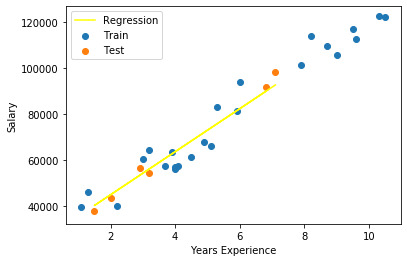

In [13]:
plt.scatter(XTrain, YTrain, label="Train")
plt.scatter(XTest, YTest, label="Test")
plt.plot(XTest, lr.predict(XTest), color="yellow", label="Regression")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [14]:
mean_squared_error(XTrain, YTrain)

6979147966.20625

In [15]:
mean_squared_error(XTest, YTest)

4593410681.924999

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [17]:
XTrain = sc_x.fit_transform(XTrain) # Normailzes data using (X-u)/sd
# fit: generates sd and mean
# transform: normalizes the data points using (X-u)/sd, u and sd obtained from fit()

In [18]:
XTest = sc_x.transform(XTest) # Uses mean and sd of training dataset in the formula (X-u)/sd

In [19]:
YTrain = sc_y.fit_transform(YTrain)
YTest = sc_y.transform(YTest)

In [20]:
lr.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr.predict(XTest)

array([[ 0.39453762],
       [-0.8541089 ],
       [-0.95816278],
       [-1.44374754],
       [-1.27032441],
       [ 0.49859149]])

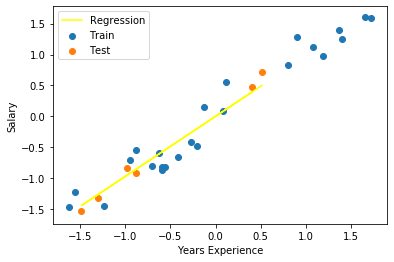

In [22]:
plt.scatter(XTrain, YTrain, label="Train")
plt.scatter(XTest, YTest, label="Test")
plt.plot(XTest, lr.predict(XTest), color="yellow", label="Regression")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [23]:
mean_squared_error(XTrain, YTrain)

0.05118774497442727

In [24]:
mean_squared_error(XTest, YTest)

0.011892890047953249

(array([2., 1., 4., 4., 3., 2., 0., 2., 3., 3.]),
 array([-1.62405181, -1.28945265, -0.95485348, -0.62025431, -0.28565514,
         0.04894403,  0.3835432 ,  0.71814236,  1.05274153,  1.3873407 ,
         1.72193987]),
 <a list of 10 Patch objects>)

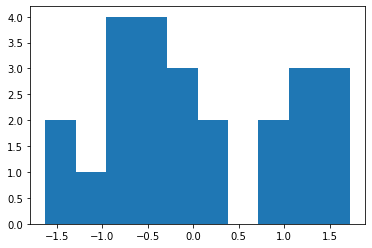

In [25]:
plt.hist(XTrain)

(array([2., 0., 1., 1., 0., 0., 0., 0., 0., 2.]),
 array([-1.48166919, -1.28233352, -1.08299784, -0.88366217, -0.68432649,
        -0.48499082, -0.28565514, -0.08631947,  0.11301621,  0.31235188,
         0.51168756]),
 <a list of 10 Patch objects>)

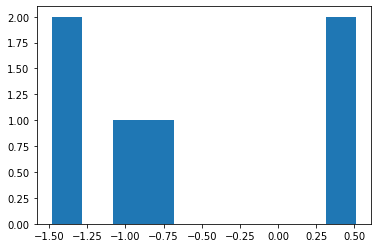

In [26]:
plt.hist(XTest)

In [27]:
np.mean(XTrain)

4.070817756958907e-16

In [28]:
np.std(XTrain)

1.0

In [29]:
lr.coef_

array([[0.97440613]])

In [30]:
sc_y.inverse_transform(YTrain)

array([[ 57081.],
       [112635.],
       [ 56957.],
       [ 46205.],
       [ 93940.],
       [ 61111.],
       [ 81363.],
       [ 60150.],
       [ 55794.],
       [113812.],
       [109431.],
       [122391.],
       [101302.],
       [ 63218.],
       [116969.],
       [121872.],
       [ 64445.],
       [105582.],
       [ 66029.],
       [ 83088.],
       [ 39343.],
       [ 67938.],
       [ 39891.],
       [ 57189.]])

In [31]:
YTrain

array([[-0.81518898],
       [ 1.24412266],
       [-0.81978549],
       [-1.21834759],
       [ 0.55112429],
       [-0.66580233],
       [ 0.08491192],
       [-0.7014253 ],
       [-0.86289633],
       [ 1.28775246],
       [ 1.12535471],
       [ 1.60576438],
       [ 0.82402368],
       [-0.58769869],
       [ 1.40477818],
       [ 1.58652575],
       [-0.54221546],
       [ 0.98267749],
       [-0.48349872],
       [ 0.14885533],
       [-1.47271265],
       [-0.41273468],
       [-1.45239903],
       [-0.81118557]])

In [32]:
exp = 1.1
sample_pred = lr.predict(sc_x.transform([[exp]]))
sample_pred = sc_y.inverse_transform(sample_pred)

In [33]:
sample_pred

array([[36381.64592531]])

In [34]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [66]:
x_T=x.T

In [67]:
X_dot = np.dot(x_T, x)

In [68]:
Y_dot = np.dot(x_T, y)

In [69]:
X_inv = np.linalg.inv(X_dot)

In [70]:
theta = np.dot(X_inv, Y_dot) 
theta

array([[13254.93845442]])